# Práctica 3: Regresión logística multi-clase y redes neuronales
---
### Autores:
Raúl Murillo Montero - 5º Doble Grado en Ingeniería Informática - Matemáticas   
Miguel Sierra Esteso - 4º Grado en Ingeniería Informática

---
**Fecha de entrega:** 8 de noviembre de 2018, 16.00h

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt

## 1. Regresión logística multi-clase
El objetivo de esta primera parte de la práctica es aplicar regresión logística multi-clase al
reconocimiento de imágenes que representan números escritos a mano.

### 1.1. Visualización de los datos
El fichero `ex3data1.mat` contiene 5000 ejemplos de entrenamiento en el formato nativo
para matrices de Octave/Matlab.

In [2]:
data = loadmat('ex3data1.mat')
# se pueden consultar las claves con data.keys()
y = data['y']
X = data ['X']
# almacena los datos leídos en X, y

<IPython.core.display.Javascript object>


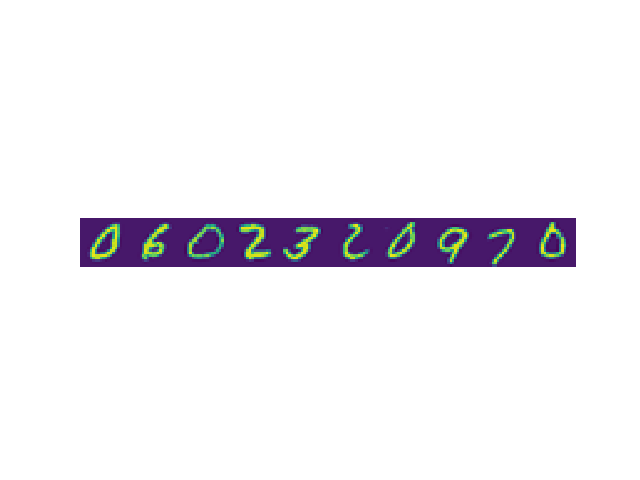

In [3]:
# Selecciona aleatoriamente 10 ejemplos y los pinta
sample = np.random.choice(X.shape[0], 10)
plt.figure()
plt.imshow(X[sample, : ].reshape(-1, 20).T)
plt.axis('off')
plt.show()

### 1.2. Vectorización de la regresión logística
Para aplicar regresión logística al reconocimiento de dígitos tendrás que entrenar 10 clasificadores
logísticos diferentes, uno para cada posible valor del dígito a reconocer.

In [4]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [5]:
def coste(theta, x, y):
    return -((np.log(sigmoid(x.dot(theta)))).T.dot(y) + (np.log(1 - sigmoid(x.dot(theta)))).T.dot(1 - y))/len(y)

#### Vectorización del gradiente

In [6]:
def gradiente(theta, x, y):
    return (x.T.dot(sigmoid(x.dot(theta)) - y))/len(y)

#### Vectorización de la versión regularizada

In [7]:
def coste_reg(theta, x, y, l):
    return (coste(theta, x, y) + l/(2*len(y))*(np.square(theta[1:])).sum())

In [8]:
def gradiente_reg(theta, x, y, l):
    # para no incluir el término de regularización en el cálculo del gradiente respecto de theta_0
    aux = np.hstack(([0],theta[1:]))
    return (gradiente(theta, x, y) + l*aux/len(y))

### 1.3 Clasificación de uno frente a todos

In [9]:
def oneVsAll (X, y, num_etiquetas, reg):
    """
    oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización 'reg' y devuelve el resultado en una matriz, donde
    la fila i-ésima corresponde al clasificador de la etiqueta i-ésima
    """
    # Add 1's column
    X_aux = np.hstack([np.ones((len(y), 1)), X])
    # Matriz de parámetros
    T = np.zeros([num_etiquetas, len(X_aux[0])])
    
    for k in range(num_etiquetas):
        labels = ((y==k+1)*1).ravel() # Sin ravel(): ERROR de broadcasting!!!!
        T[k] = opt.fmin_tnc(func=coste_reg, x0=T[k], fprime=gradiente_reg, args=(X_aux, labels, reg))[0]
    
    return T

Por último, una vez que hayas entrenado al clasificador, podrás utilizarlo para hacer predicciones
y comprobar cuántos de los ejemplos de entrenamiento clasifica correctamente. Para ello,
debes calcular para cada ejemplo de entrenamiento cuál es la “probabilidad” de que pertenezca
a cada una de las clases, asignándole la etiqueta (1, 2, . . . , o K) para la que se obtenga el valor
máximo.

In [10]:
# Clasifier training
theta_matrix = oneVsAll(X, y, 10, 0.1)

In [11]:
def predict(instance, theta_matrix):
    """
    Calcula, para un ejemplo concreto (instance), la clase
    a la cuál es más probable que pertenezca
    """
    predictions = sigmoid(np.dot(theta_matrix, instance))
    return np.argmax(predictions)+1

In [12]:
def accuracy(X, y, theta):
    """
    Calcula el ratio de instancias clasificadas correctamente
    """
    n = len(y)
    predictions = np.empty(n)
    for i in range(n):  # Can do this in vectorial-way??
        predictions[i] = predict(X[i], theta)
    return np.mean(predictions==y)

In [13]:
X_aux = np.hstack([np.ones((len(y), 1)), X])
print('Se ha clasificado correctamente el ', end='')
print("%.2f" %(accuracy(X_aux, y.ravel(), theta_matrix)*100), end='')
print('% de los ejemplos de entrenamiento')

Se ha clasificado correctamente el 96.46% de los ejemplos de entrenamiento


## 2. Redes neuronales
El objetivo de esta parte de la práctica es utilizar los pesos proporcionados para una red
neuronal ya entrenada sobre los ejemplos para evaluar su precisión sobre esos mismos ejemplos.   
La red neuronal tiene la siguiente estructura:
formada por tres capas, con 400 unidades en la primera capa (además de la primera fijada siempre
a +1), 25 en la capa oculta y 10 en la capa de salida.   
El fichero `ex3weights.mat` contiene las matrices $\Theta^{(1)}$ y $\Theta^{(2)}$ con el resultado de haber
entrenado la red neuronal.

In [14]:
weights = loadmat('ex3weights.mat')
theta1, theta2 = weights ['Theta1'] , weights ['Theta2']
# Theta1 es de dimensión 25 x 401
# Theta2 es de dimensión 10 x 26

Debes implementar la propagación hacia adelante para computar el valor de $h_{\theta}(x^{(i)})$ para
cada ejemplo $i$.

In [15]:
# Input layer: a1 = X_aux
# Hidden layer
z2 = theta1.dot(X_aux.T)
a2 = sigmoid(z2)
# Add a2_0
a2 = np.vstack([np.ones((len(a2[0]))), a2])
# Output layer
z3 = theta2.dot(a2)
a3 = sigmoid(z3) # hypothesis

# NN's accuracy
n = len(y)
NNpredictions = np.empty(n)
for i in range(n):  # Can do this in vectorial-way??
    NNpredictions[i] = np.argmax(a3[:, i])+1
print('La red neuronal ha clasificado correctamente el ', end='')
print((np.mean(NNpredictions==y.ravel())*100), end='')
print('% de los ejemplos de entrenamiento')

La red neuronal ha clasificado correctamente el 97.52% de los ejemplos de entrenamiento
